In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filpkart-mobiles/Mobiles_Dataset.csv


# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/kaggle/input/filpkart-mobiles/Mobiles_Dataset.csv')
df = data

# **Exploratory Data Analysis**

In [4]:
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         984 non-null    object 
 2   Discount price       984 non-null    object 
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    object 
 5   Reviews              984 non-null    object 
 6   RAM (GB)             984 non-null    object 
 7   Storage (GB)         984 non-null    object 
 8   Display Size (inch)  984 non-null    float64
 9   Camera               908 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
dtypes: float64(2), object(10)
memory usage: 92.4+ KB


# **Data Modification and Cleaning**

In [6]:
#Deleting unwanted columns from the dataset
df = df.drop('Link',axis = 1)
df = df.drop('Description', axis = 1)
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP


In [7]:
#Company Name
df['Company Name'] = df['Product Name'].apply(lambda x: x.split()[0])
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Company Name
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,Apple
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,Apple
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,Apple
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,OnePlus
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,OnePlus


In [8]:
# Step 1: Remove special characters (like ₹)
df['Actual price'] = df['Actual price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True)
df['Discount price'] = df['Discount price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True)

# Step 2: Replace "NIL" and other non-numeric strings with NaN
df['Actual price'] = df['Actual price'].replace("NIL", pd.NA)
df = df.dropna(subset=['Actual price'])

df['Discount price'] = df['Discount price'].replace("NIL", pd.NA)
df = df.dropna(subset=['Discount price'])

# Step 3: Convert to numeric
df['Actual price'] = pd.to_numeric(df['Actual price'])
df['Discount price'] = pd.to_numeric(df['Discount price'])

df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Company Name
0,"Apple iPhone 15 (Green, 128 GB)",79600,65999,4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,Apple
1,"Apple iPhone 15 (Blue, 128 GB)",79600,65999,4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,Apple
2,"Apple iPhone 15 (Black, 128 GB)",79600,65999,4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,Apple
3,"OnePlus N20 SE (JADE WAVE, 128 GB)",19999,11489,4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,OnePlus
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)",16999,12999,4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,OnePlus


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 930 entries, 0 to 983
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         930 non-null    object 
 1   Actual price         930 non-null    int64  
 2   Discount price       930 non-null    int64  
 3   Stars                930 non-null    float64
 4   Rating               930 non-null    object 
 5   Reviews              930 non-null    object 
 6   RAM (GB)             930 non-null    object 
 7   Storage (GB)         930 non-null    object 
 8   Display Size (inch)  930 non-null    float64
 9   Camera               857 non-null    object 
 10  Company Name         930 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 87.2+ KB


# **1. Sales Count by Company**

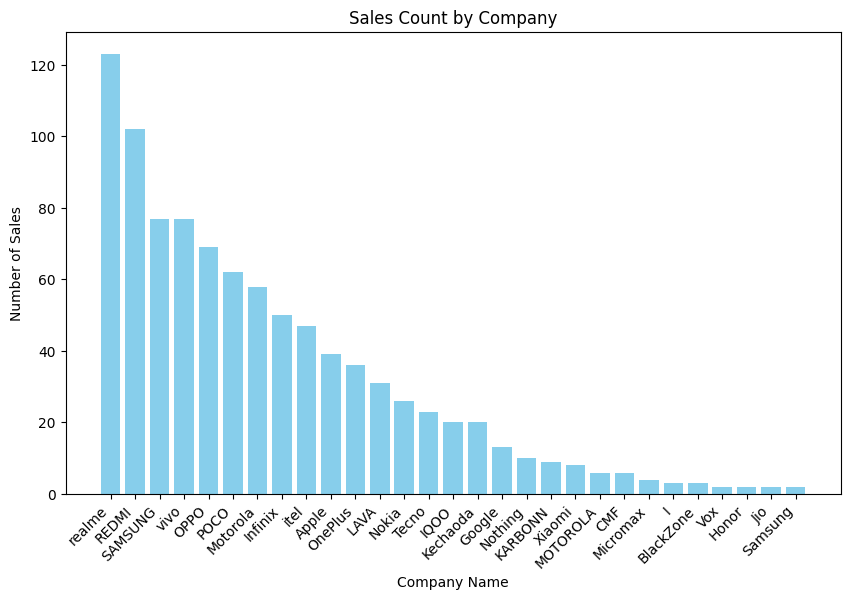

In [10]:
#Bar Graph Showing the Percentage of Sales by Company
vc = df['Company Name'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(vc.index, vc.values, color='skyblue')

# Adding title and labels
plt.title('Sales Count by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Sales')

# Rotate x-axis labels if there are many companies
plt.xticks(rotation=45, ha='right')
plt.show()

# **2. Price Range of Products Sold**

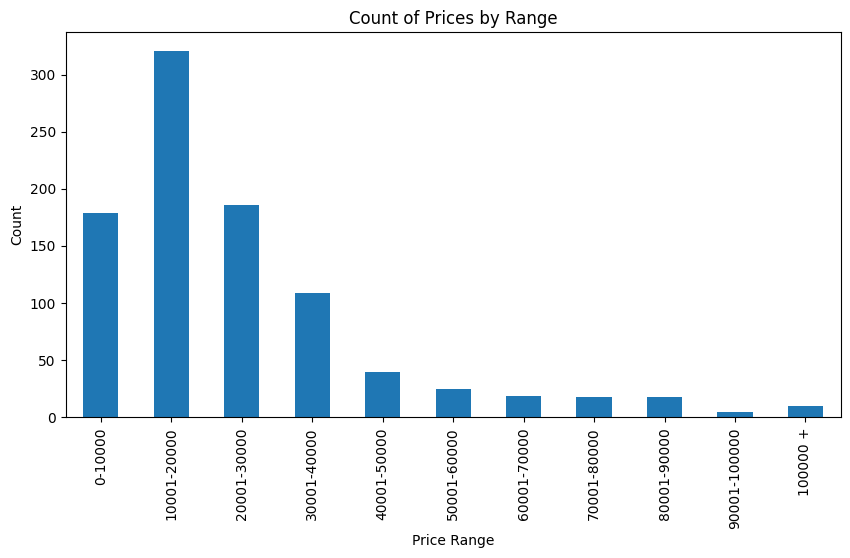

In [11]:
# Creating Price Ranges
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 500000]
labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', 
          '50001-60000', '60001-70000', '70001-80000', '80001-90000', '90001-100000','100000 +']

# Create a new column with price ranges
df['Price Range'] = pd.cut(df['Actual price'], bins=bins, labels=labels, right=False)

# Count the occurrences of each price range
price_range_counts = df['Price Range'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
price_range_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Count of Prices by Range')
plt.show()

# **3. Average Star Ratings by Users**

Average Star Rating:  4.24989247311828


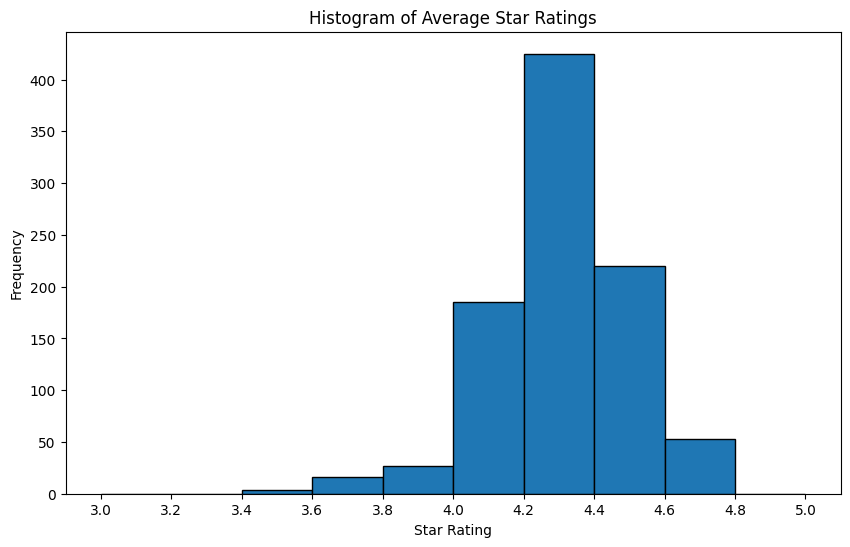

In [12]:
#Average Star Ratings given by Users
average_rating = df['Stars'].fillna(0).mean()
print("Average Star Rating: ", average_rating)

# Define custom bin edges
bins = [3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Stars'], bins=bins, edgecolor='black', alpha = 1)
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Star Ratings')
plt.xticks(bins)
plt.show()

# **4. Average Star Rating per Company**

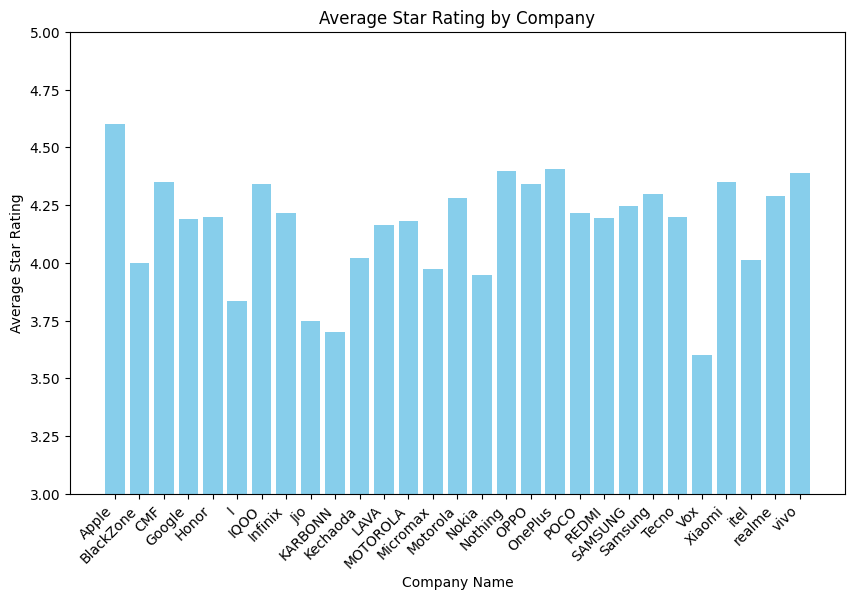

In [13]:
# Calculate the average star rating per company
avg_ratings = df.groupby('Company Name')['Stars'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(avg_ratings.index, avg_ratings.values, color='skyblue')

# Adding title and labels
plt.title('Average Star Rating by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Star Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.ylim(3, 5)  # Assuming the rating scale is from 0 to 5

plt.show()

# **5. Price vs RAM & Storage Analysis**

Text(0, 0.5, 'Price')

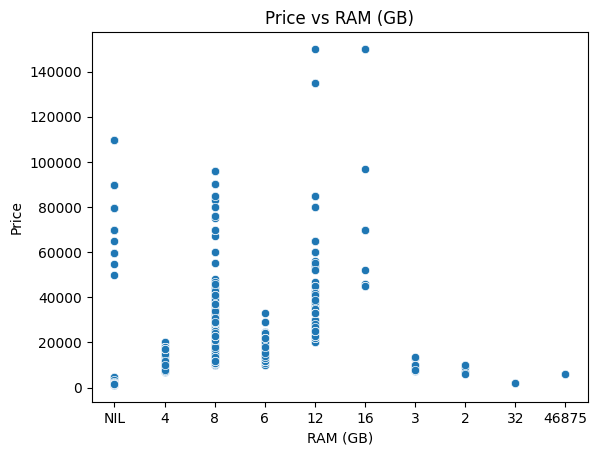

In [14]:
# Price vs RAM
sns.scatterplot(x=df['RAM (GB)'], y=df['Actual price'])
plt.title('Price vs RAM (GB)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

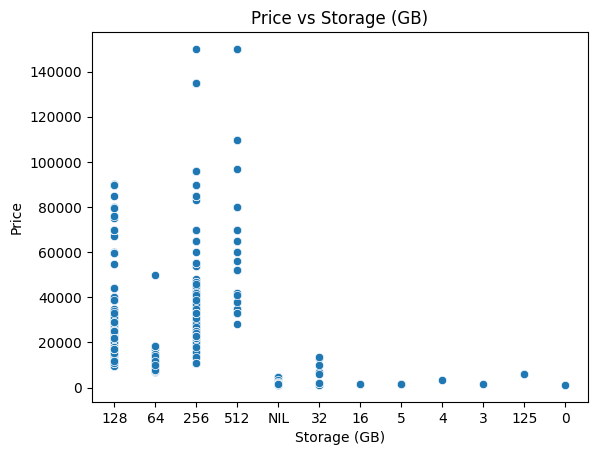

In [15]:
# Price vs Storage
sns.scatterplot(x=df['Storage (GB)'], y=df['Actual price'])
plt.title('Price vs Storage (GB)')
plt.xlabel('Storage (GB)')
plt.ylabel('Price')

# **6. Display Size vs Price Analysis**

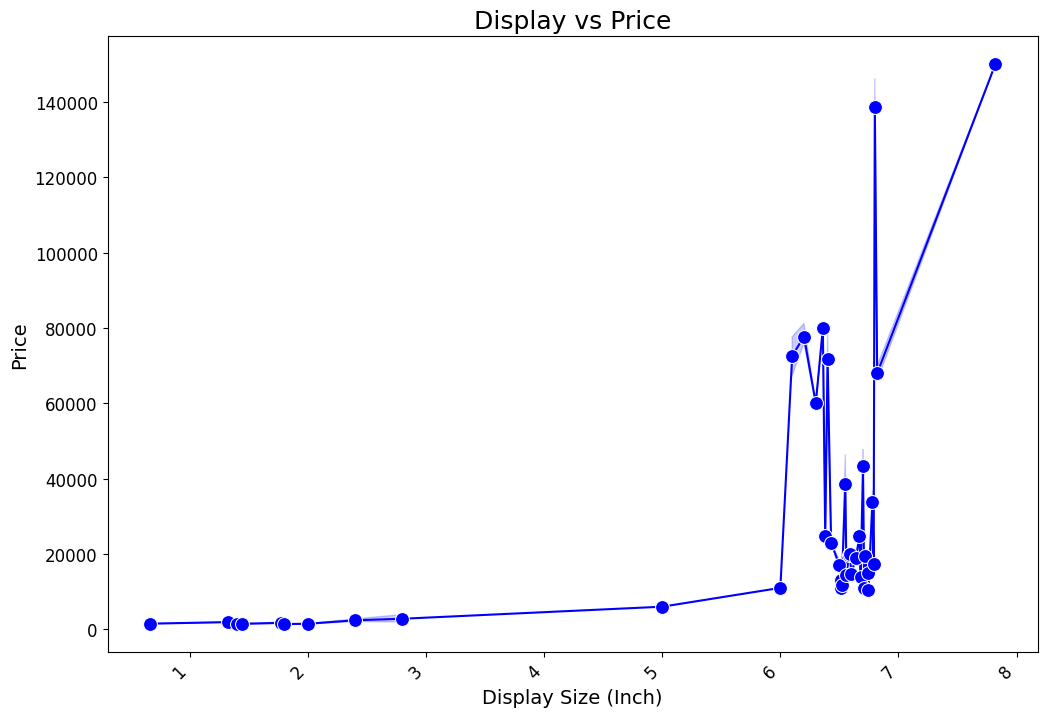

In [16]:
# Set the figure size
plt.figure(figsize=(12, 8))  # Increased figure size for better readability

# Create the line plot
sns.lineplot(x='Display Size (inch)', y='Actual price', data=df, marker='o', markersize=10, color='b')

# Adding title and labels with larger font size
plt.title('Display vs Price', fontsize=18)
plt.xlabel('Display Size (Inch)', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Increase the size of tick labels
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

plt.show()
